# SVD

This notebook illustrates the embedding of a graph by the [singular value decomposition](https://scikit-network.readthedocs.io/en/latest/reference/embedding.html#svd) of the adjacency (or biadjacency) matrix.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import sknetwork as skn

## Directed graphs

**Loading**

In [3]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Embedding**

In [4]:
# embedding of the graph considered as bipartite (each node considered twice)
bispectral = skn.embedding.BiSpectral()
bispectral.fit(adjacency)

BiSpectral(embedding_dimension=2, weights='degree', col_weights='degree', regularization=0.01, relative_regularization=True, scaling='multiply', solver=LanczosSVD())

In [5]:
embedding = bispectral.embedding_
embedding.shape

(14, 2)

**Visualization**

In [6]:
graph = nx.from_scipy_sparse_matrix(adjacency, create_using=nx.DiGraph())

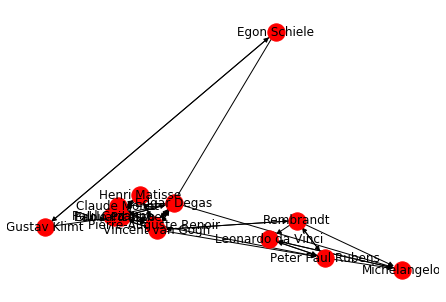

In [7]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos=embedding, node_color='r', labels=names)

**Metrics**

In [8]:
skn.embedding.cosine_modularity(adjacency, embedding)

0.199196083565466

## Bipartite graphs

**Loading**

In [9]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Embedding**

In [10]:
bispectral = skn.embedding.BiSpectral()
bispectral.fit(biadjacency)

BiSpectral(embedding_dimension=2, weights='degree', col_weights='degree', regularization=0.01, relative_regularization=True, scaling='multiply', solver=LanczosSVD())

In [11]:
embedding = bispectral.embedding_
embedding.shape

(15, 2)

In [12]:
col_embedding = bispectral.col_embedding_
col_embedding.shape

(16, 2)

**Visualization**



In [13]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [14]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [15]:
n1, n2 = biadjacency.shape
pos = {i: embedding[i, :] for i in range(n1)} 
pos.update({n1 + i: col_embedding[i, :] for i in range(n2)})

In [16]:
colors = n1 * ['r'] + n2 * ['b']

In [17]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

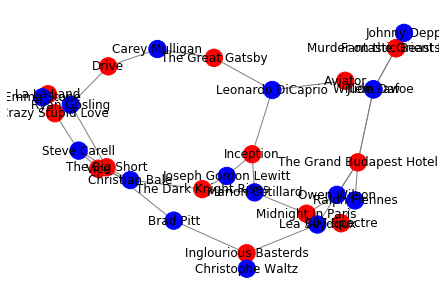

In [18]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=colors, labels=names, edge_color='grey')